In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("marketing_data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace = True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace = True)

In [6]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.drop("CUST_ID",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
for i in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    min= (Q1 - (1.5*IQR))
    max= (Q3 + (1.5*IQR))
    if df[(df[i] > max) | (df[i] < min)].any(axis = None):
        print(i,"Yes")
    else:
        print(i,"No")

BALANCE Yes
BALANCE_FREQUENCY Yes
PURCHASES Yes
ONEOFF_PURCHASES Yes
INSTALLMENTS_PURCHASES Yes
CASH_ADVANCE Yes
PURCHASES_FREQUENCY No
ONEOFF_PURCHASES_FREQUENCY Yes
PURCHASES_INSTALLMENTS_FREQUENCY No
CASH_ADVANCE_FREQUENCY Yes
CASH_ADVANCE_TRX Yes
PURCHASES_TRX Yes
CREDIT_LIMIT Yes
PAYMENTS Yes
MINIMUM_PAYMENTS Yes
PRC_FULL_PAYMENT Yes
TENURE Yes


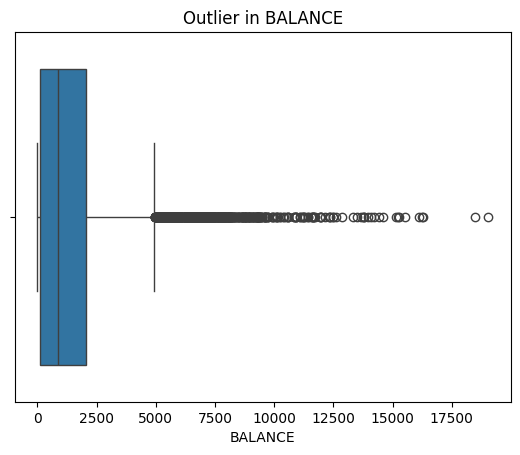

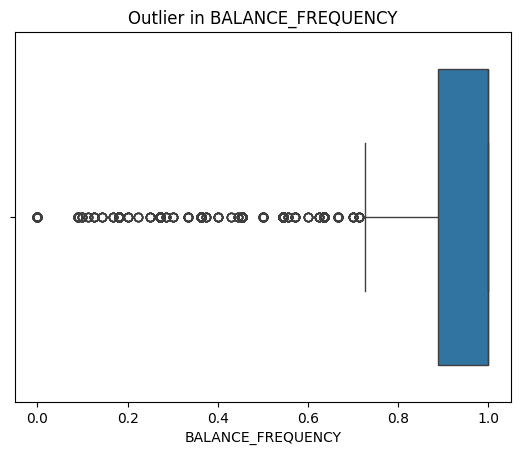

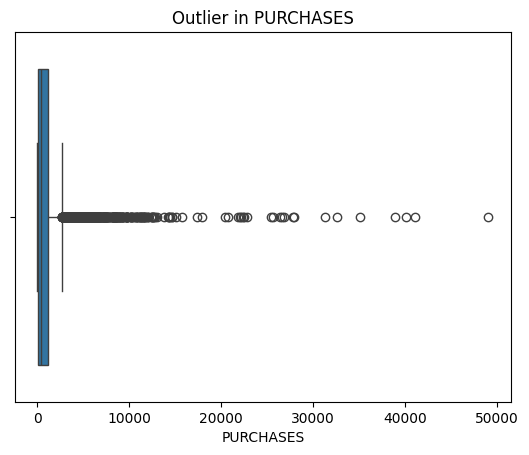

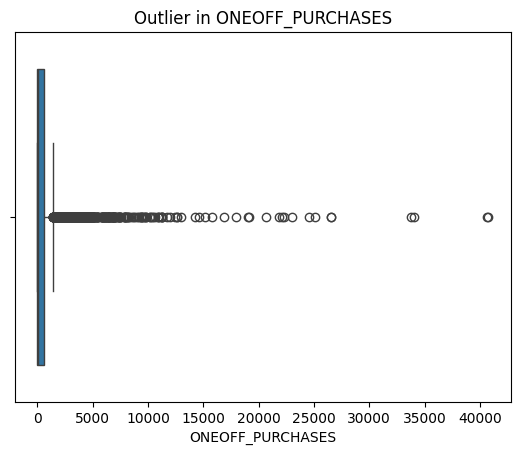

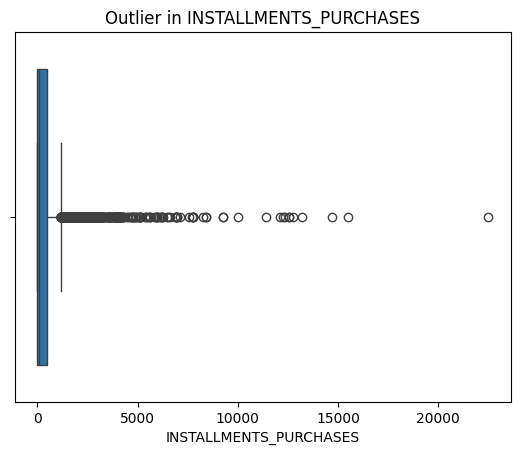

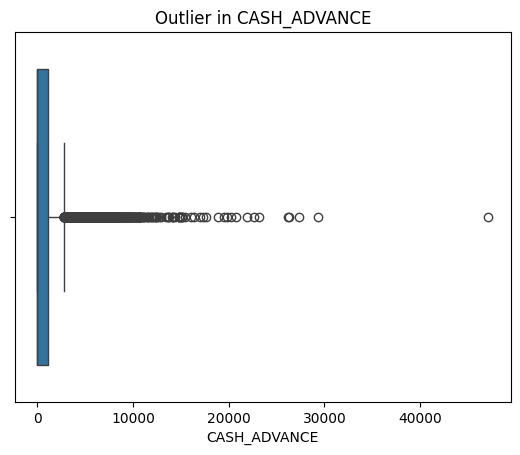

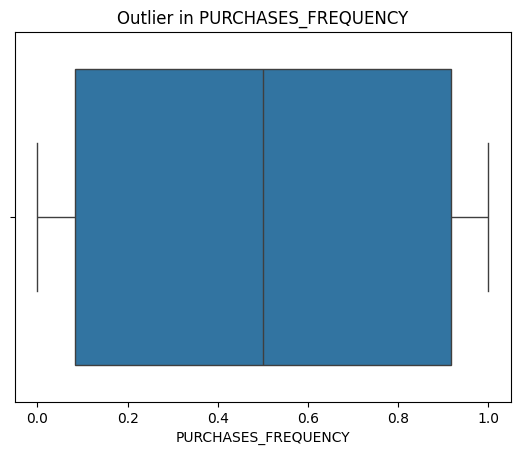

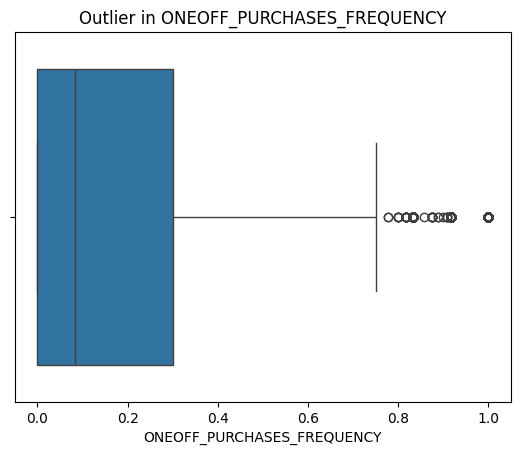

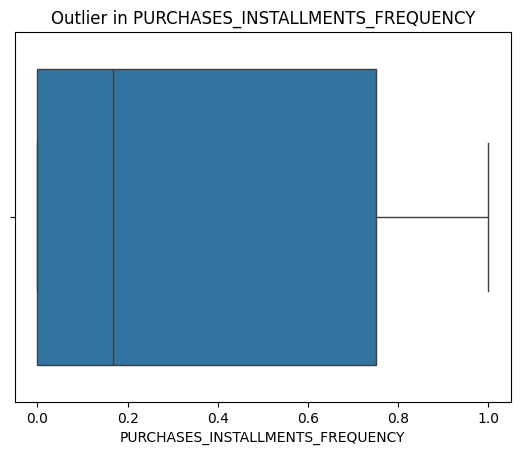

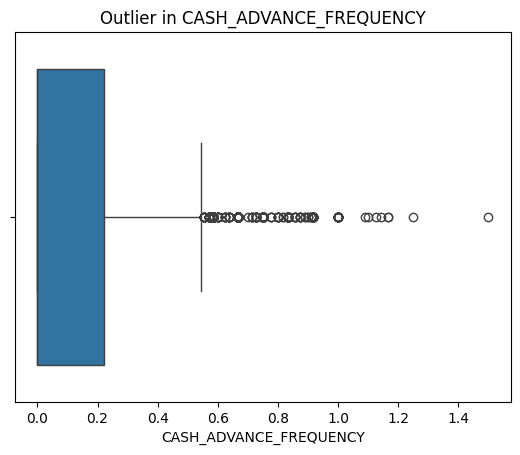

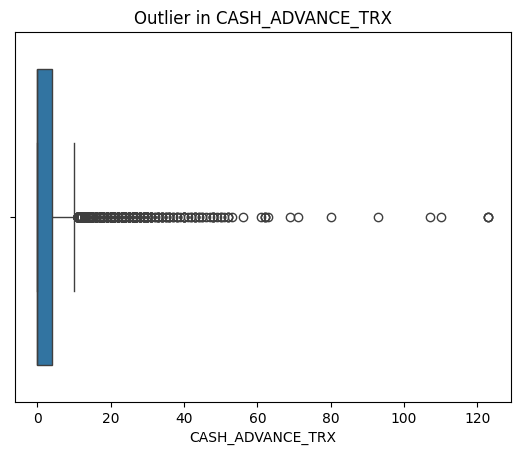

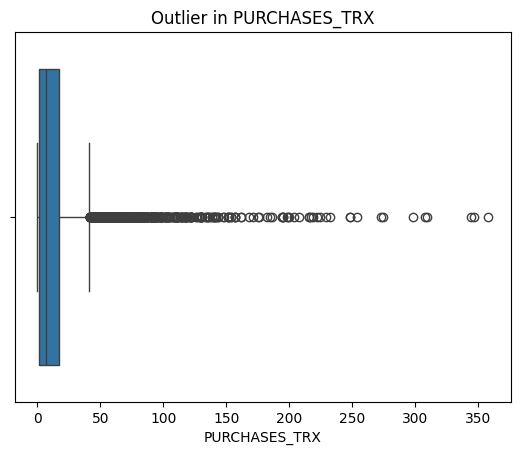

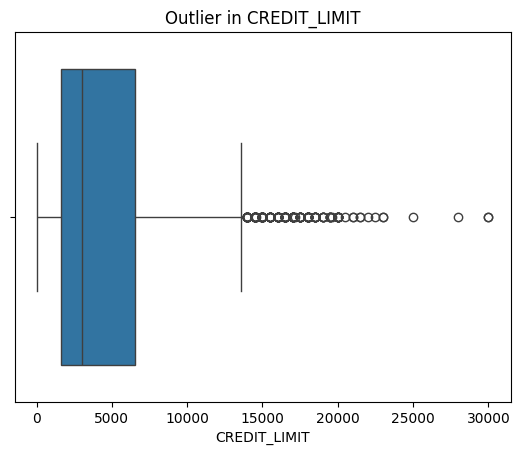

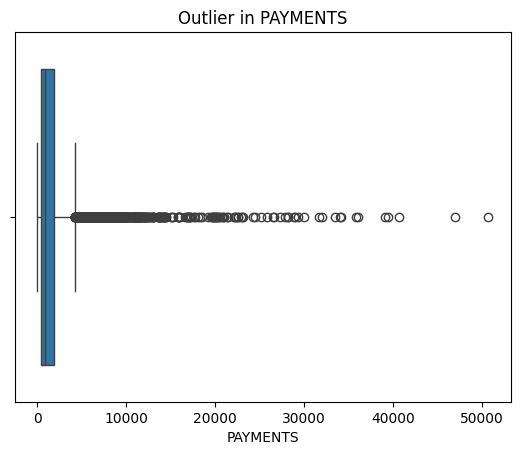

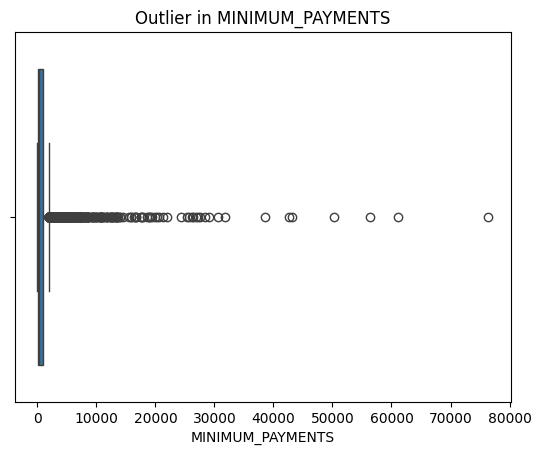

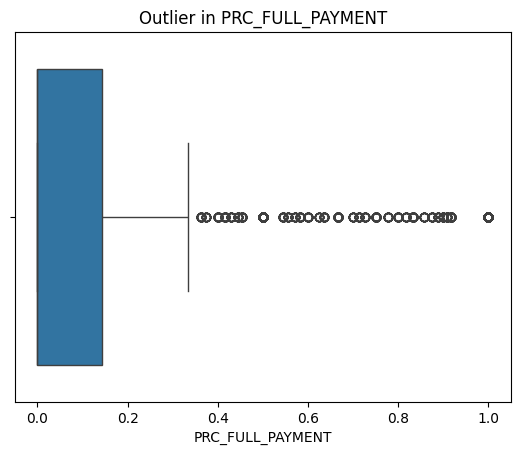

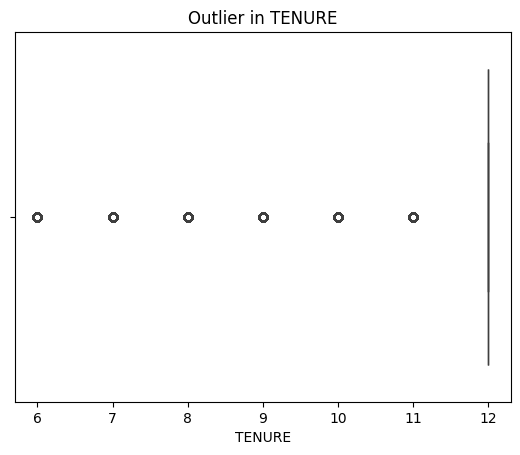

In [11]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Outlier in {column}')
    plt.show()

In [12]:
for i in df.iloc[:,:-1].select_dtypes(include=[np.number]).columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    min_range = (Q1 - (1.5*IQR))
    max_range = (Q3 + (1.5*IQR))
    df.loc[df[i] < min_range,i] = min_range
    df.loc[df[i] > max_range,i] = max_range

In [13]:
for i in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    min_range = (Q1 - (1.5*IQR))
    max_range = (Q3 + (1.5*IQR))
    if df[(df[i] > max_range) | (df[i] < min_range)].any(axis = None):
        print(i,"Yes")
    else:
        print(i,"No")

BALANCE No
BALANCE_FREQUENCY No
PURCHASES No
ONEOFF_PURCHASES No
INSTALLMENTS_PURCHASES No
CASH_ADVANCE No
PURCHASES_FREQUENCY No
ONEOFF_PURCHASES_FREQUENCY No
PURCHASES_INSTALLMENTS_FREQUENCY No
CASH_ADVANCE_FREQUENCY No
CASH_ADVANCE_TRX No
PURCHASES_TRX No
CREDIT_LIMIT No
PAYMENTS No
MINIMUM_PAYMENTS No
PRC_FULL_PAYMENT No
TENURE Yes


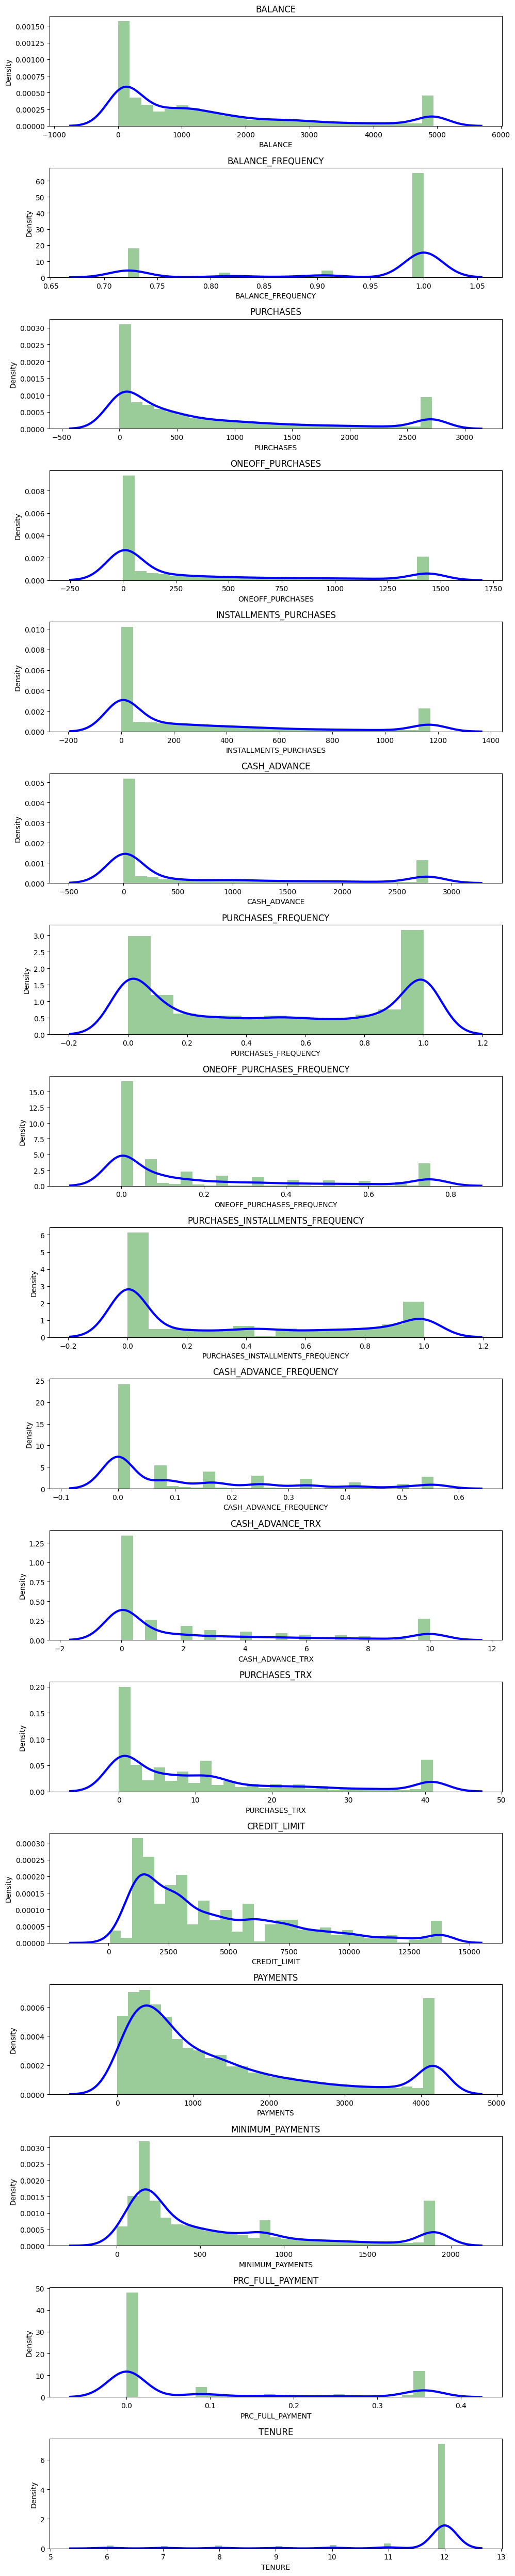

In [14]:
plt.figure(figsize=(10,50))
numeric_columns = df.select_dtypes(include=[np.number]).columns

for i in range(len(numeric_columns)):
    plt.subplot(len(numeric_columns), 1, i+1)
    sns.distplot(df[numeric_columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(numeric_columns[i])

plt.tight_layout()
plt.show()

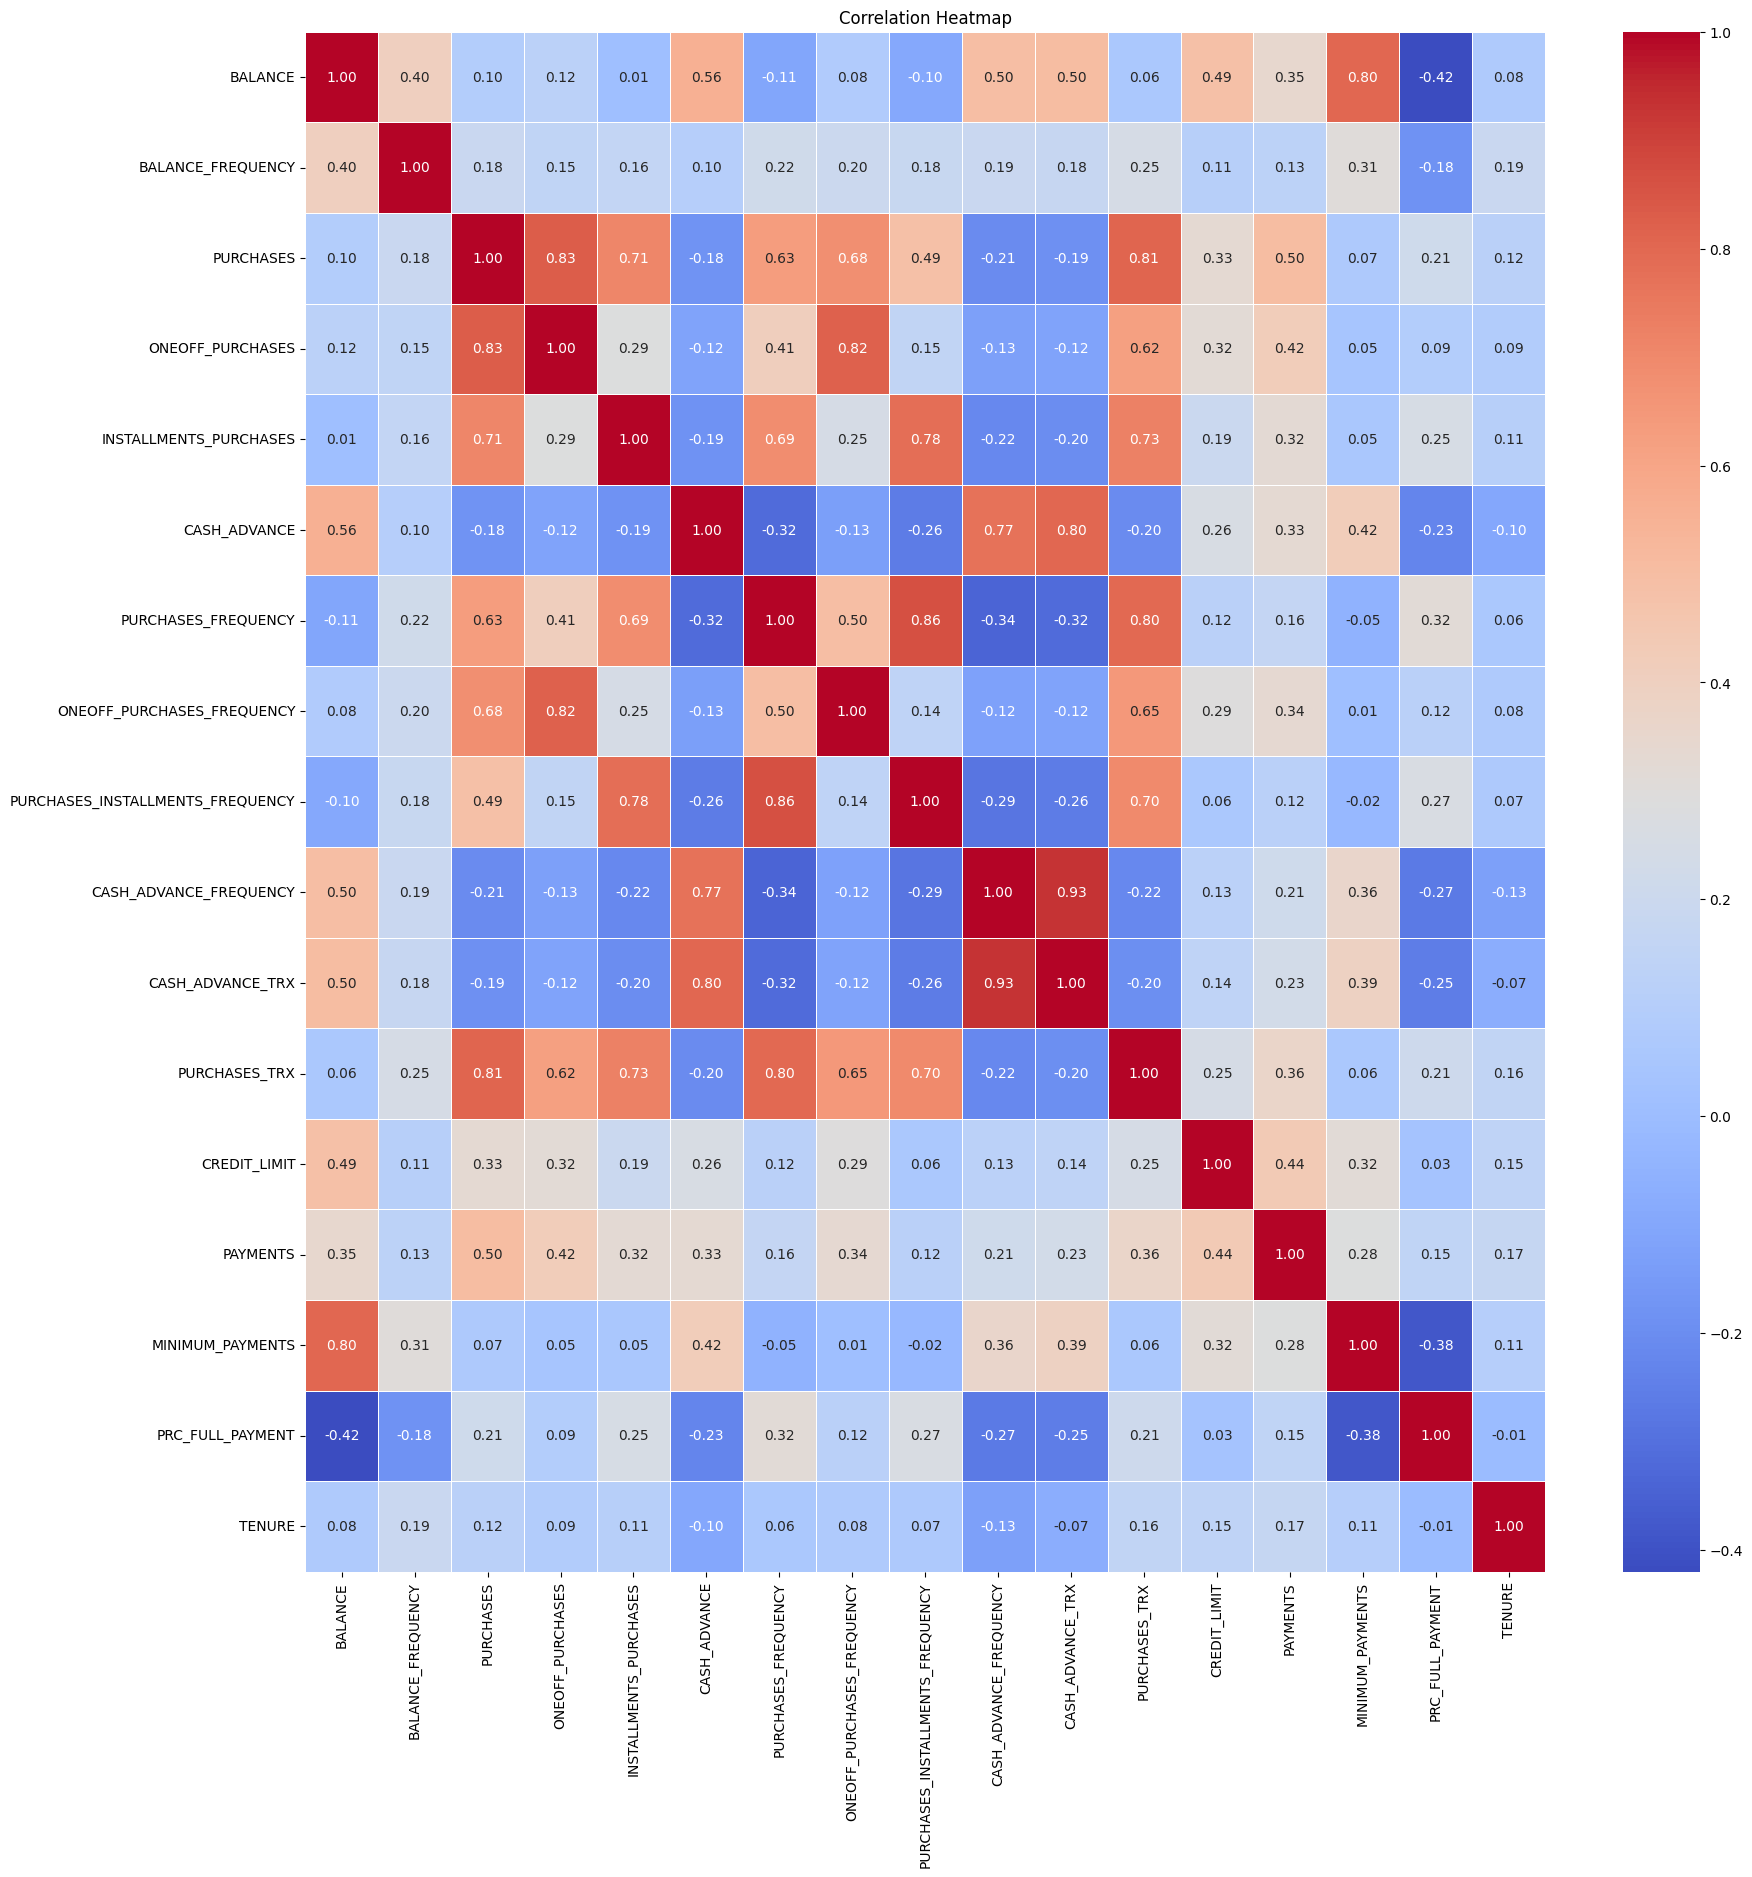

In [15]:
df.select_dtypes(include=[np.number]).corr()
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df1 = df.copy()
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [19]:
from yellowbrick.cluster import KElbowVisualizer

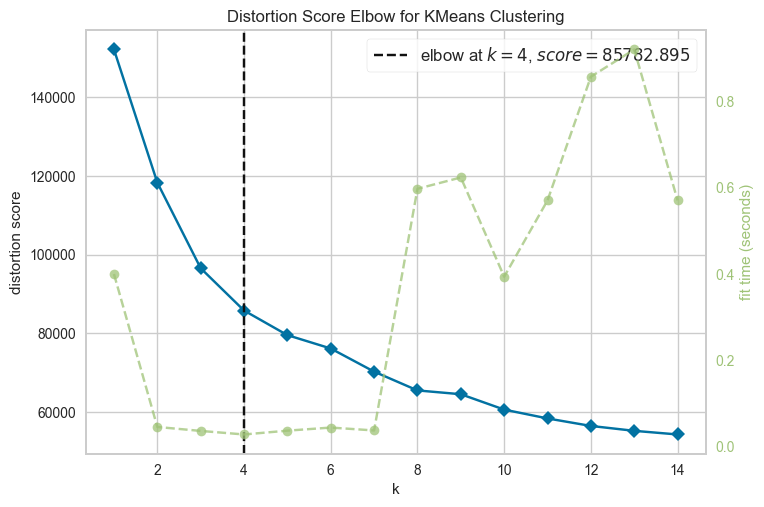

In [20]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,15))   
visualizer.fit(df1_scaled)
visualizer.poof()
plt.show()

In [21]:
kmeans = KMeans(4)
kmeans.fit(df1_scaled)
labels = kmeans.labels_

In [22]:
labels

array([1, 2, 0, ..., 3, 1, 1], dtype=int32)

In [23]:
kmeans.cluster_centers_.shape

(4, 17)

In [ ]:
print("Shape of kmeans.cluster_centers_:", kmeans.cluster_centers_.shape)
print("Number of columns in df1_numeric:", len(df1_numeric.columns))

In [24]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.309953,0.434252,1.681934,1.612207,0.991643,-0.250370,1.019982,1.512012,0.688435,-0.293974,-0.274655,1.515276,0.706744,0.939085,0.160520,0.272605,0.258355
1,-0.372228,-0.383570,-0.541245,-0.287071,-0.631478,-0.306143,-0.747135,-0.288759,-0.728166,-0.252182,-0.302355,-0.648643,-0.374958,-0.462451,-0.314023,-0.287559,-0.048099
2,1.105683,0.323411,-0.519319,-0.375594,-0.489542,1.481665,-0.672929,-0.372419,-0.574120,1.439921,1.495392,-0.557220,0.474315,0.469801,0.868005,-0.417508,-0.102312
3,-0.590028,-0.018129,-0.033908,-0.486308,0.607205,-0.573698,0.913671,-0.409643,1.056672,-0.587658,-0.572260,0.288486,-0.365274,-0.406456,-0.366623,0.575214,-0.039751


In [25]:
cluster_centers = scaler.inverse_transform(cluster_centers)
# creating another df again
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1867.047635,0.979779,2216.386509,1179.477167,688.394732,422.484297,0.899719,0.571324,0.638039,0.075302,1.444444,31.384384,6810.619711,2542.290158,685.530440,0.125008,11.863063
1,818.225588,0.889019,261.132089,207.436746,45.380124,366.797790,0.190489,0.110951,0.075046,0.082518,1.349773,3.164902,3150.607682,758.506572,414.087920,0.047365,11.452950
2,3090.444358,0.967478,280.415822,162.131177,101.609552,2151.851408,0.220272,0.089563,0.136267,0.374688,7.493909,4.357143,6024.181181,1945.016660,1090.217618,0.029353,11.380399
3,483.368408,0.929575,707.327706,105.468496,536.096238,99.655097,0.857051,0.080047,0.784386,0.024592,0.427323,15.385925,3183.376799,829.772702,384.000408,0.166952,11.464121


In [26]:
y_kmeans = kmeans.fit_predict(df1_scaled)
y_kmeans

array([0, 1, 2, ..., 3, 0, 0], dtype=int32)

In [27]:
creditcard_df_cluster = pd.concat([df1, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


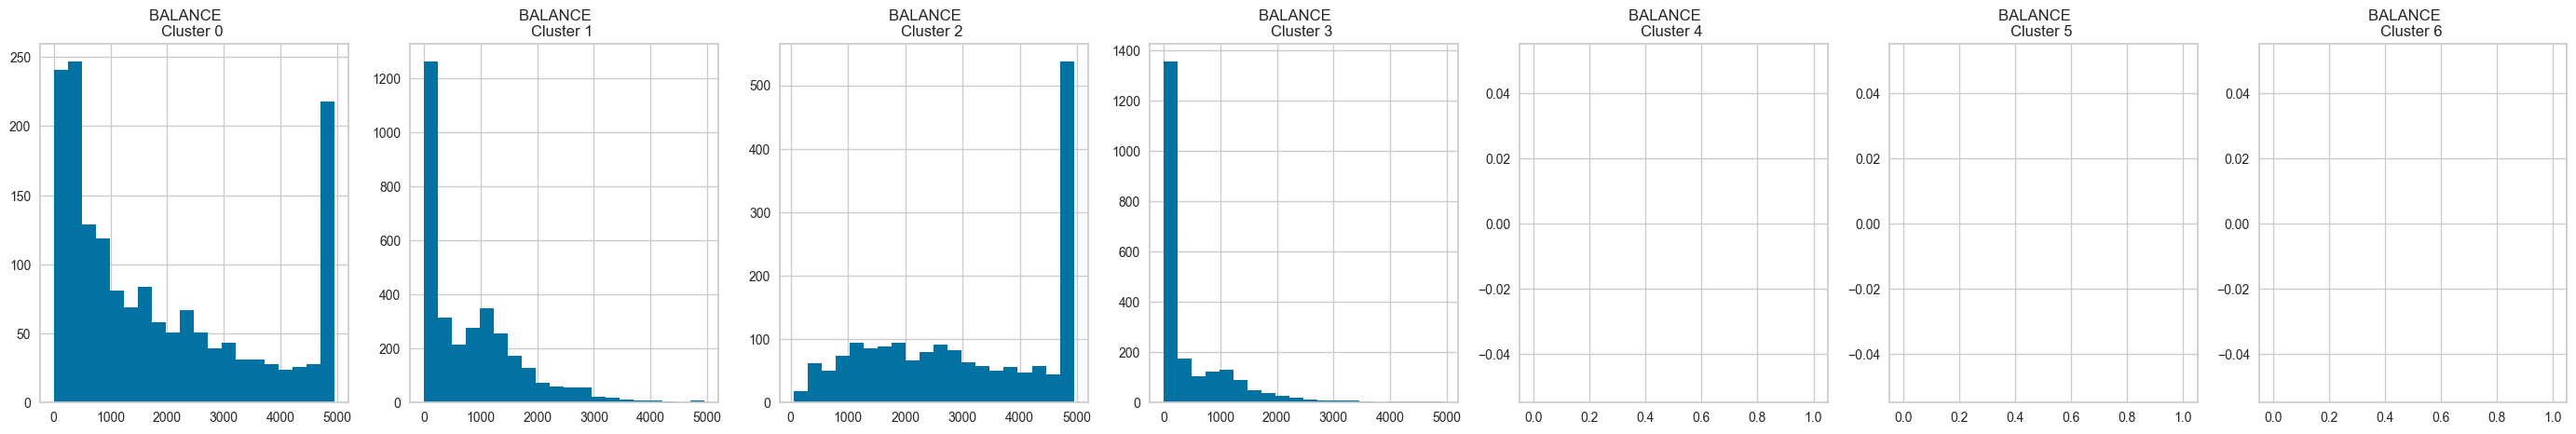

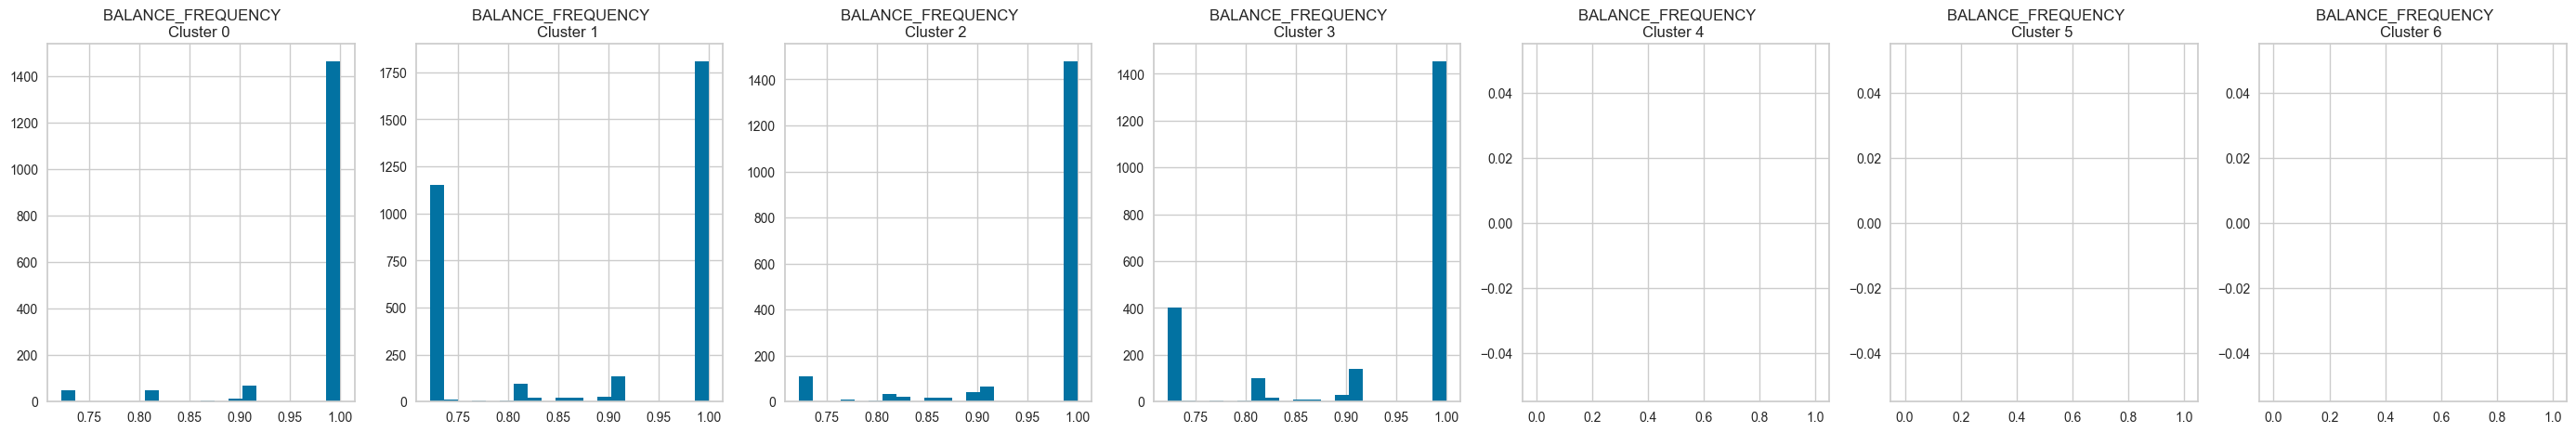

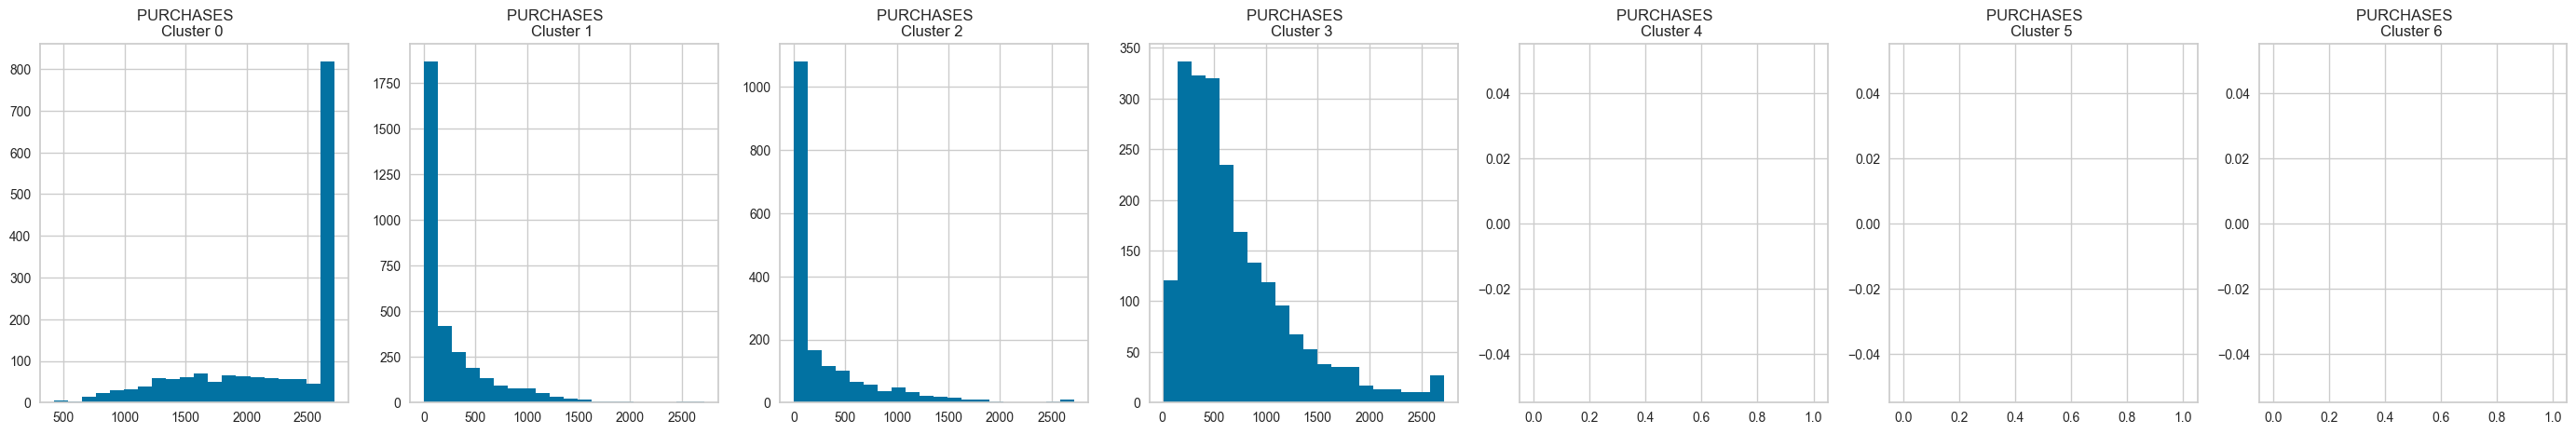

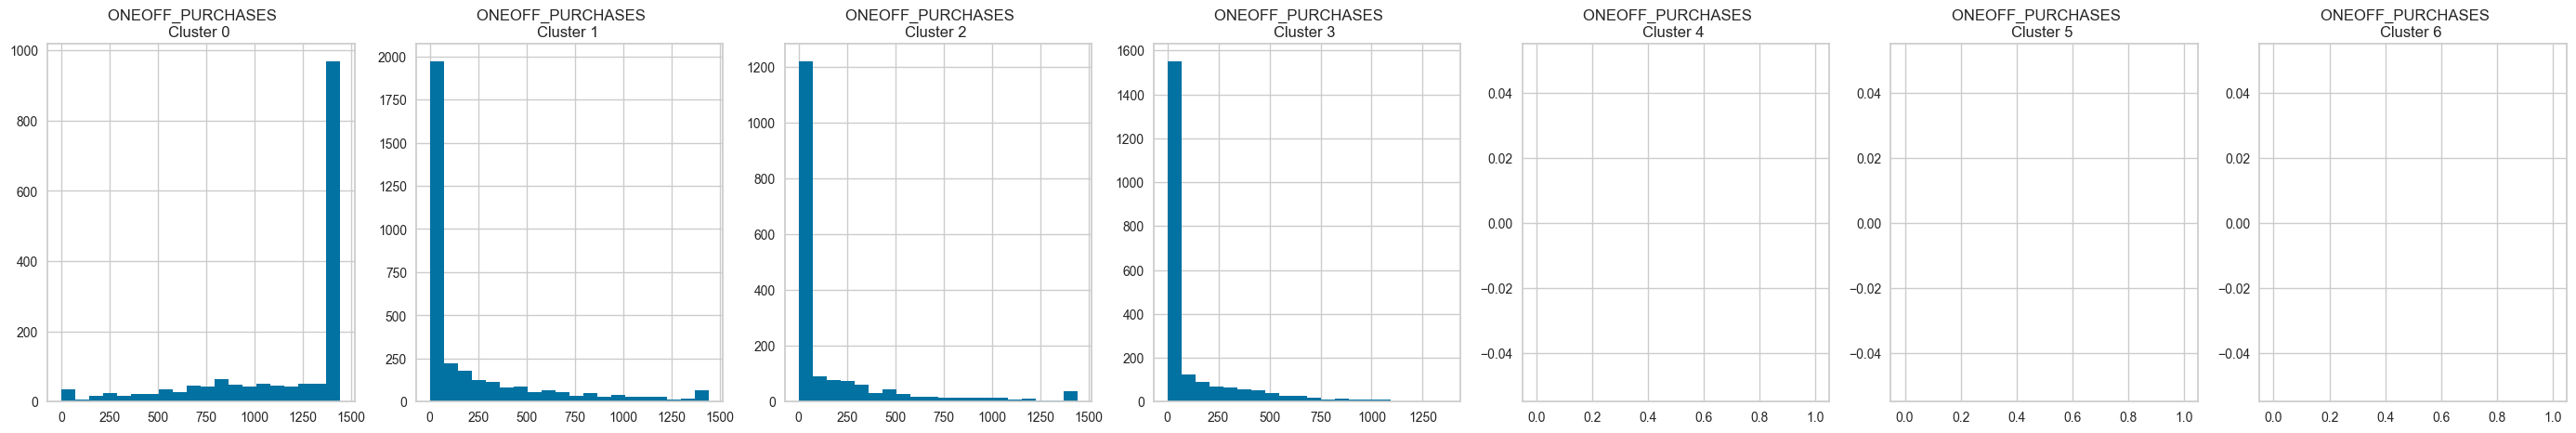

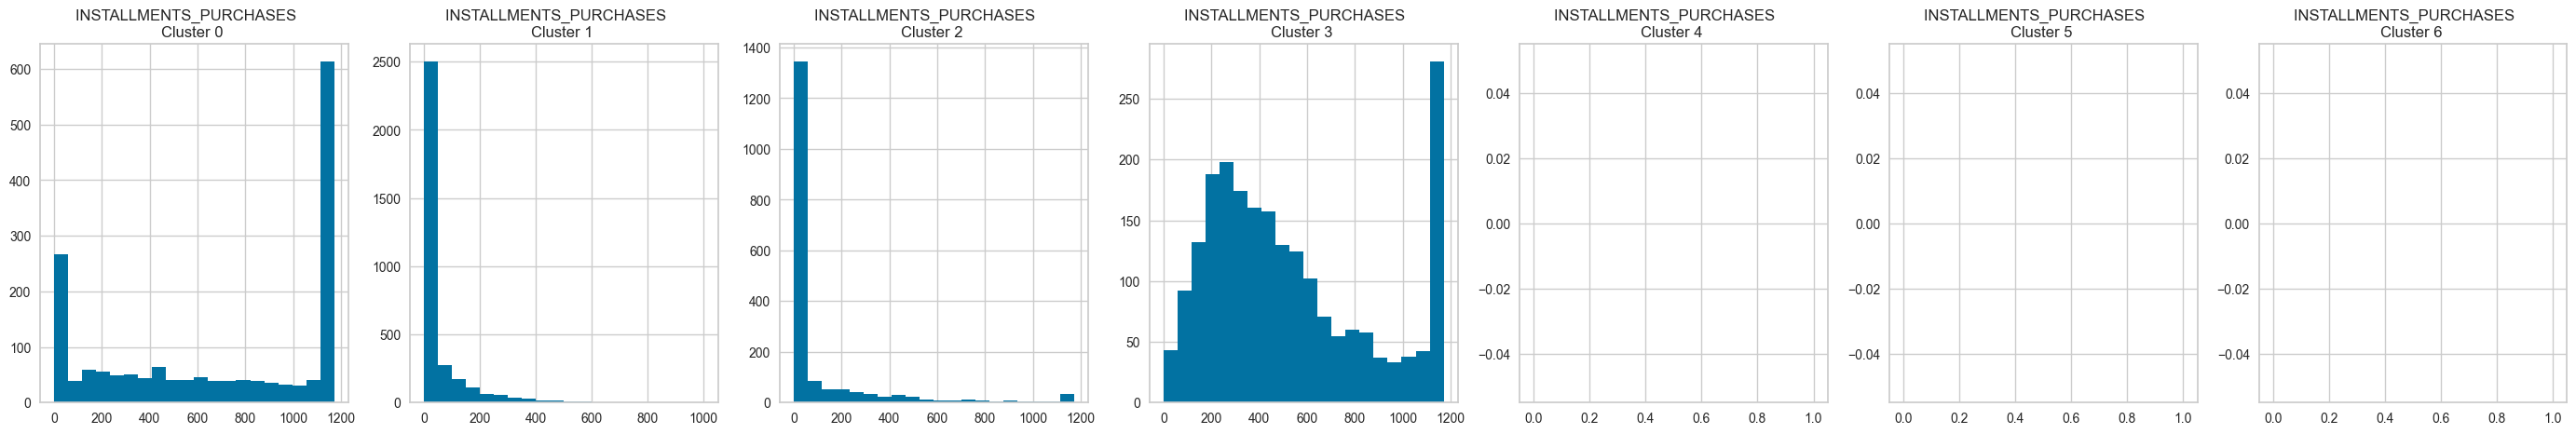

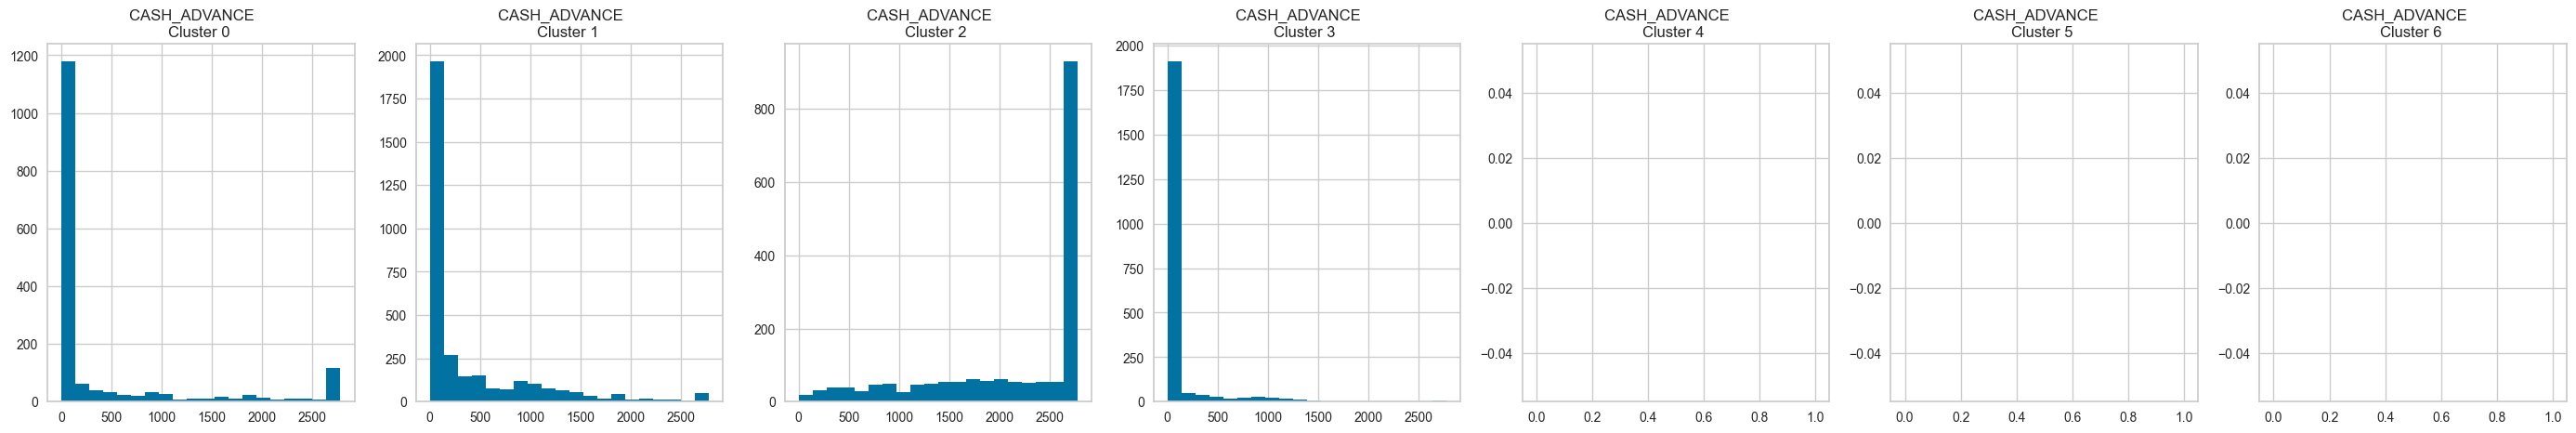

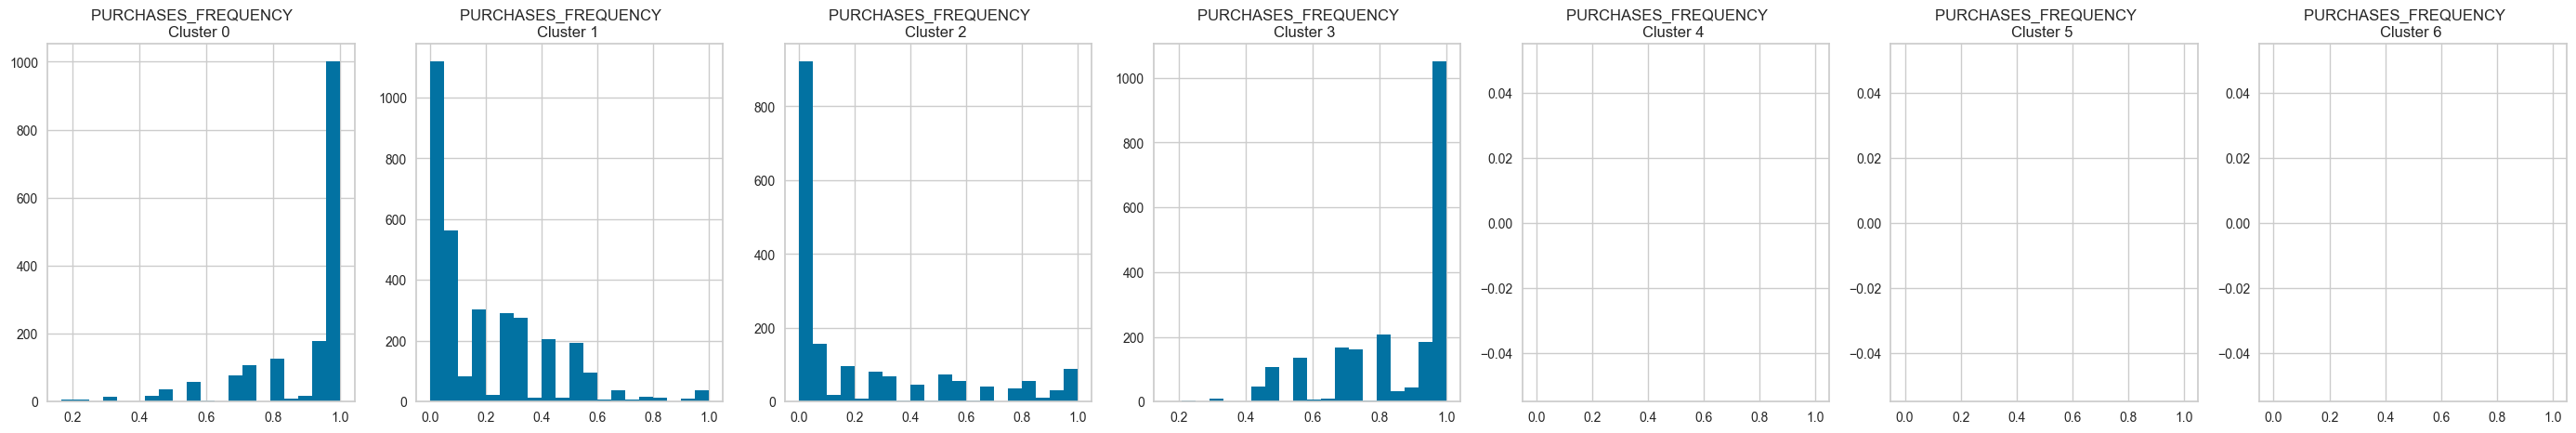

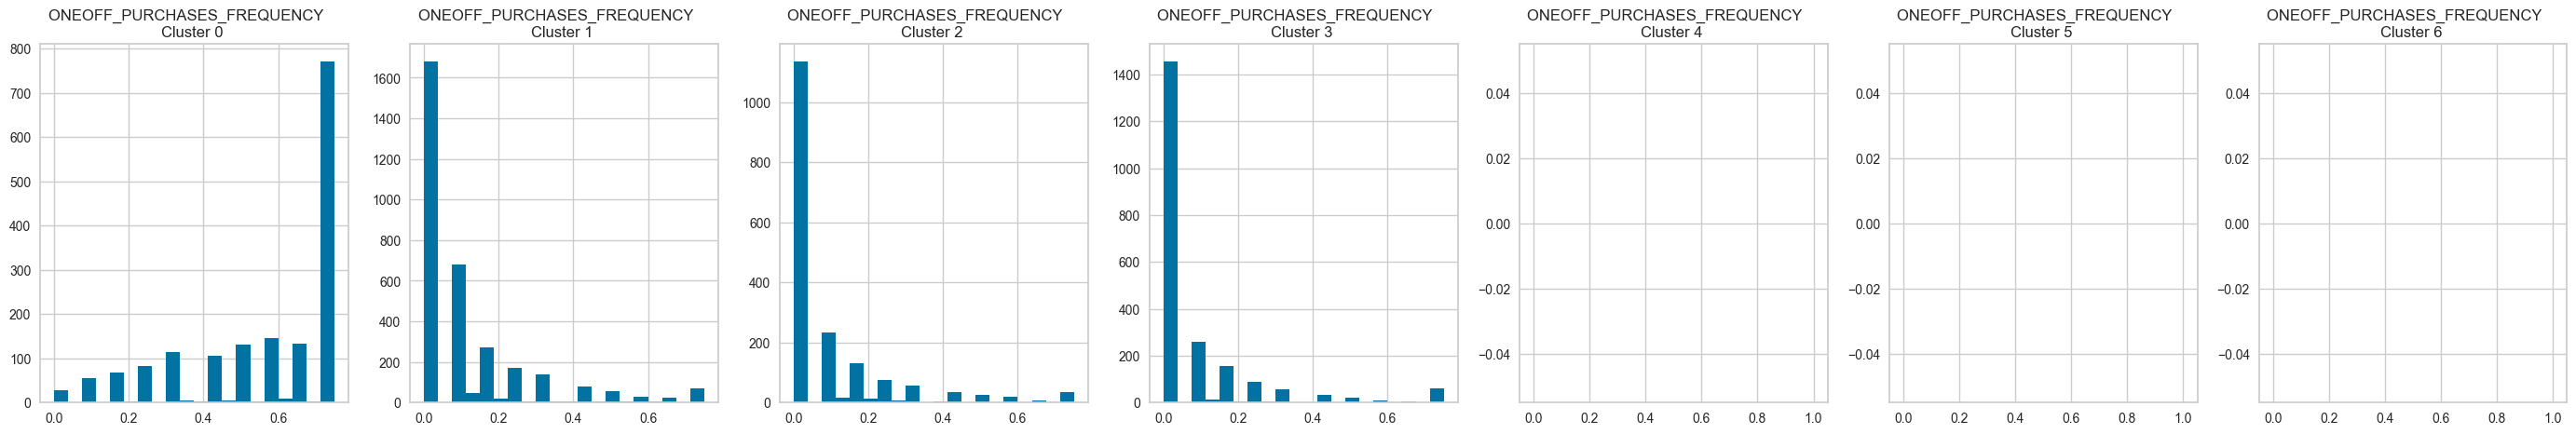

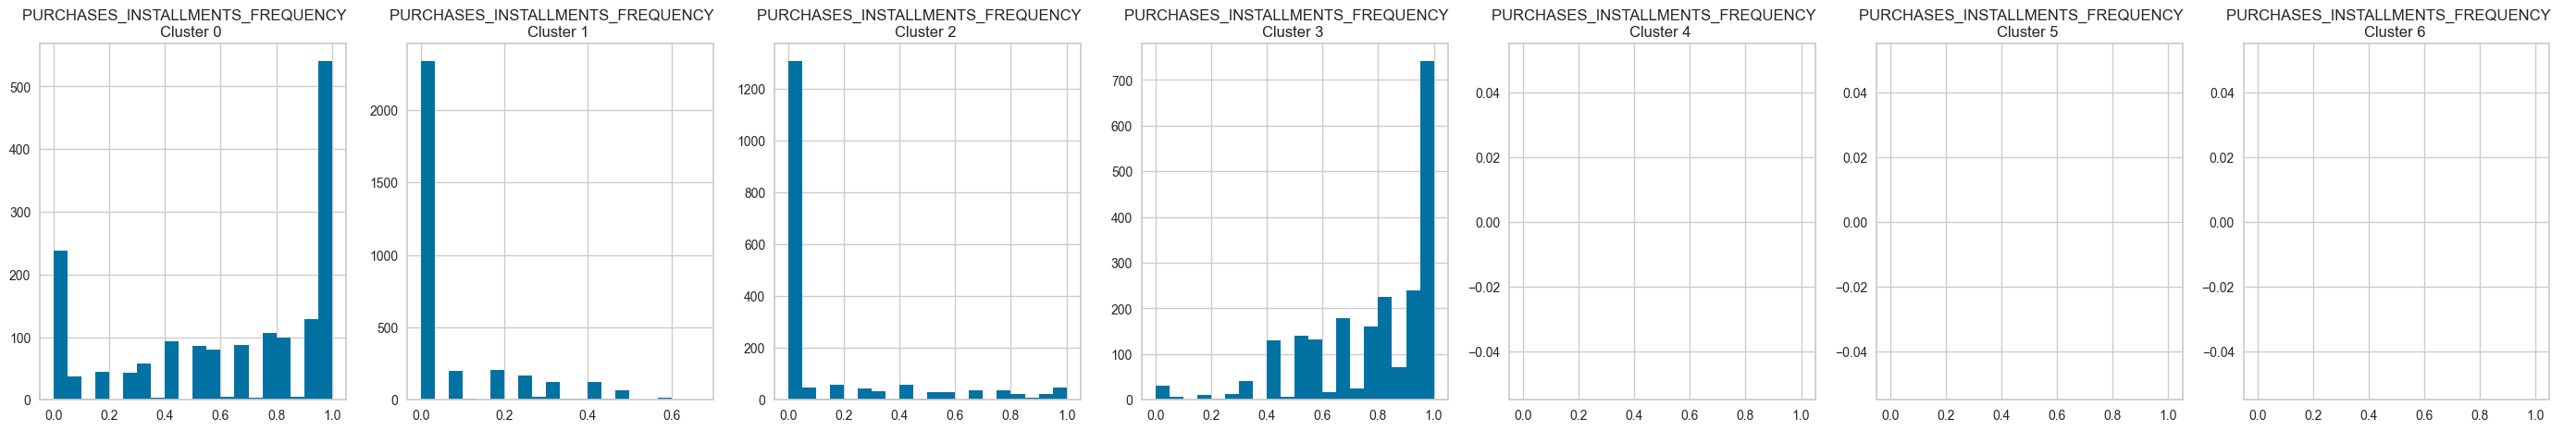

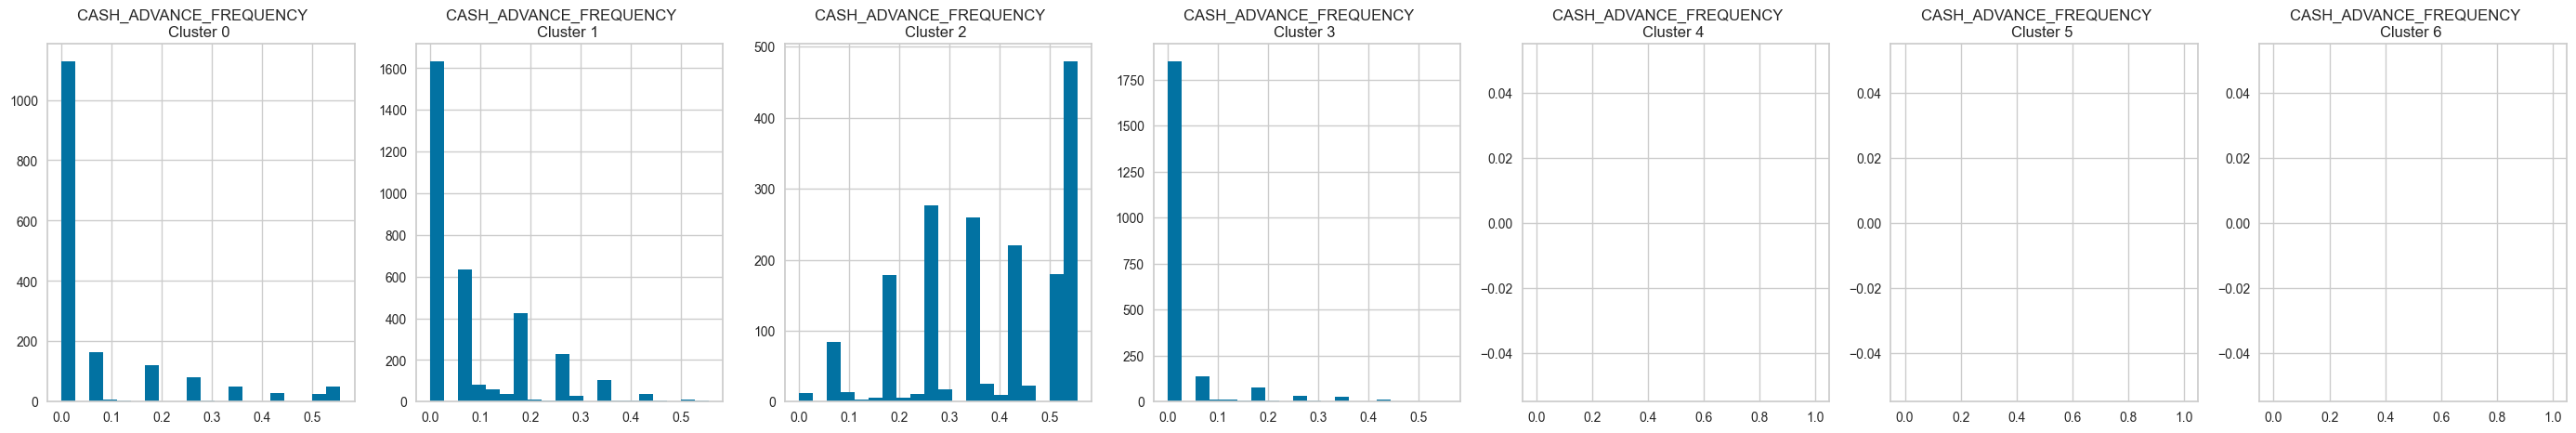

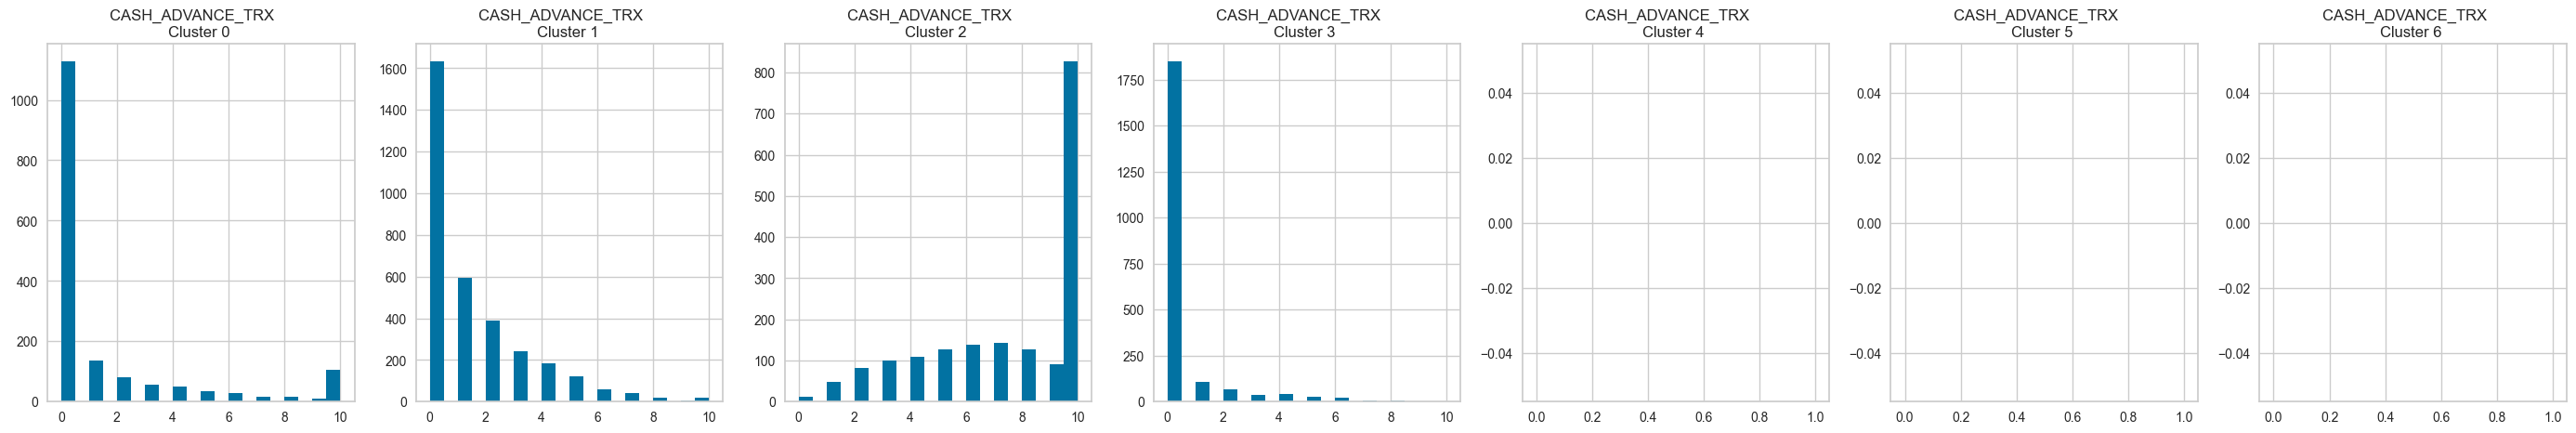

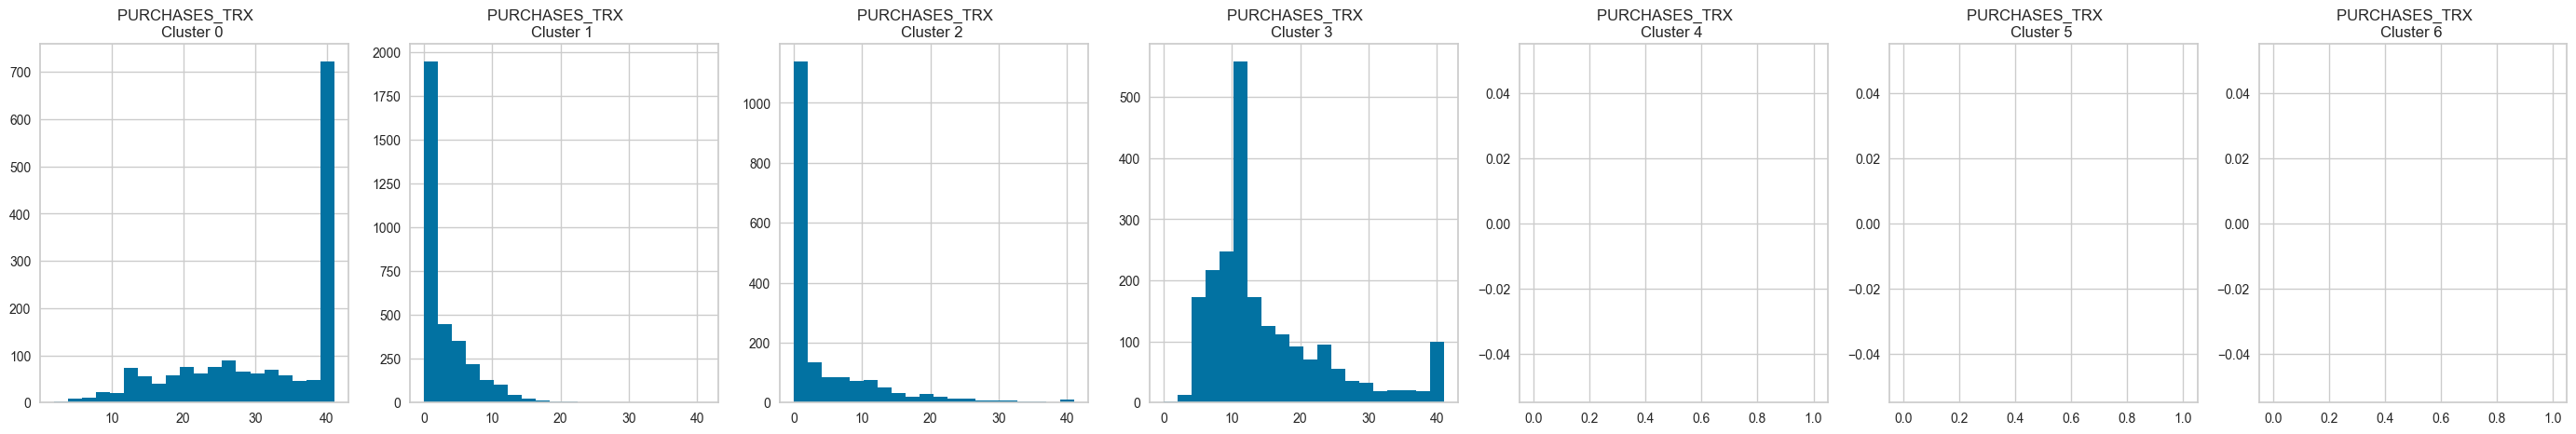

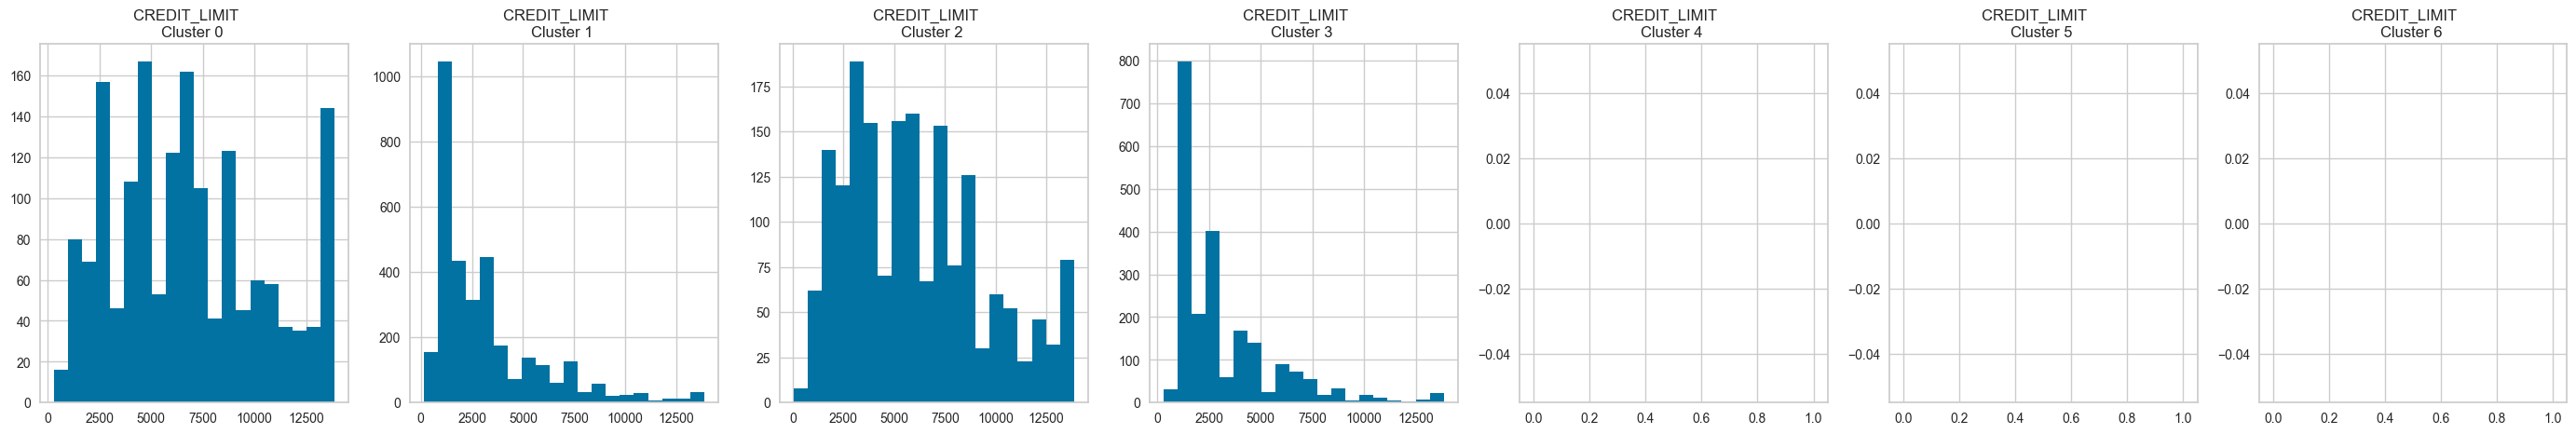

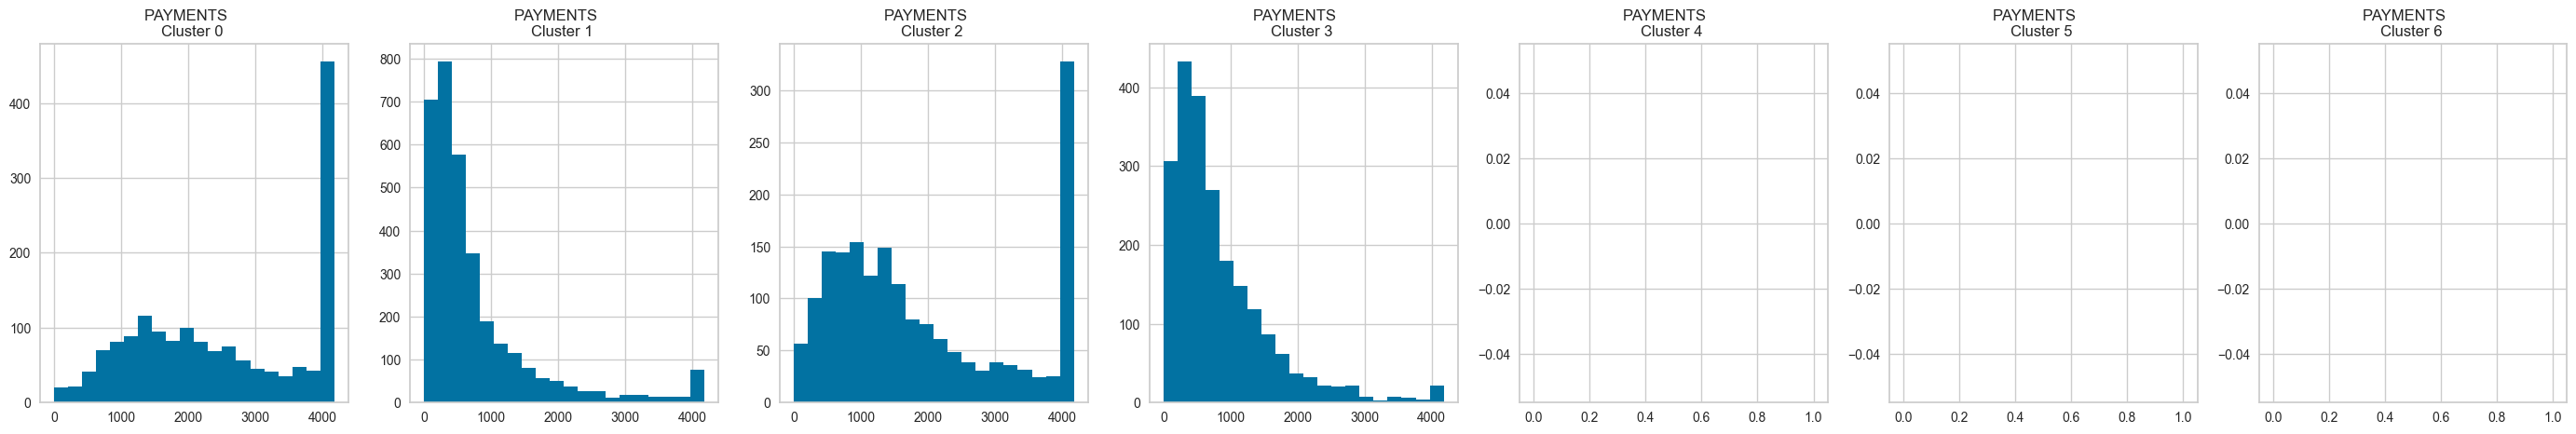

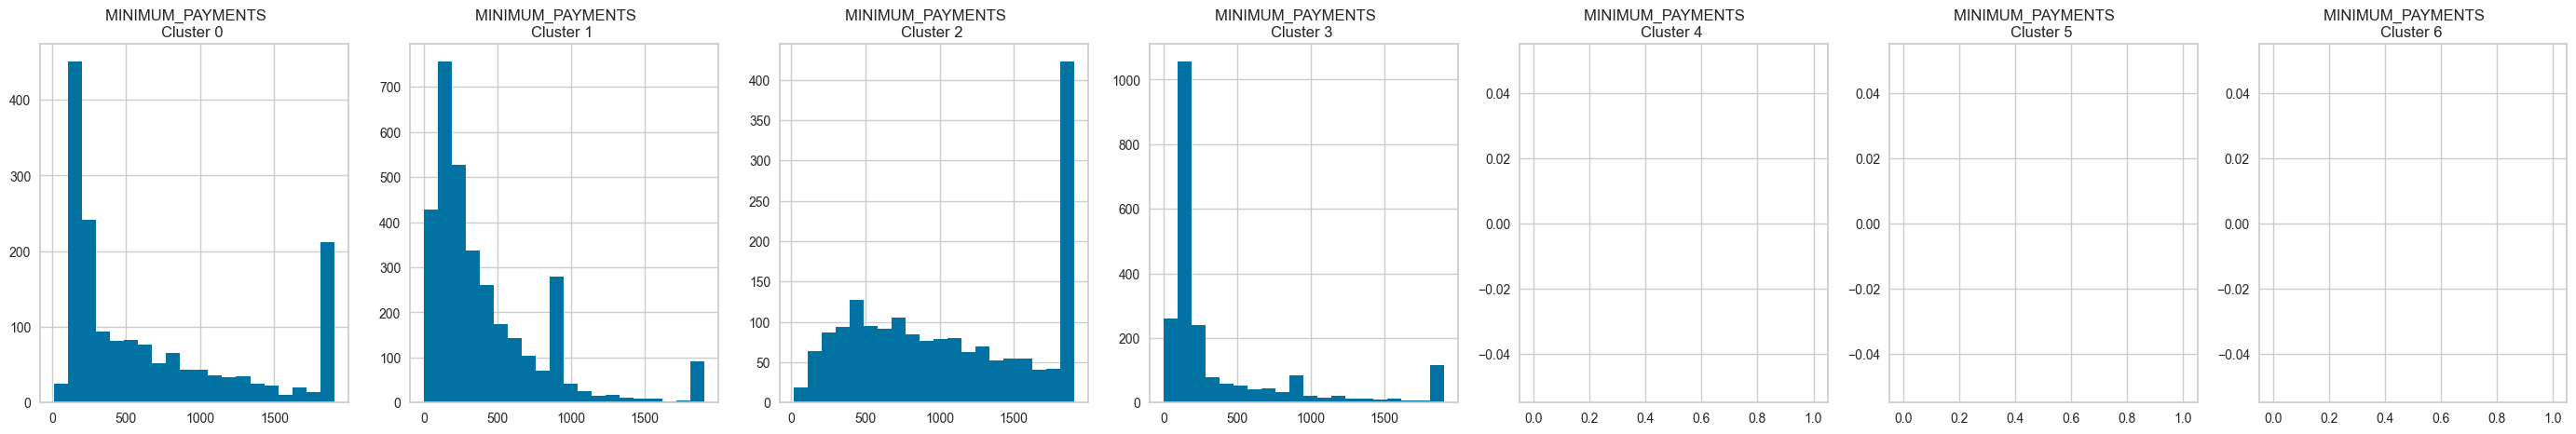

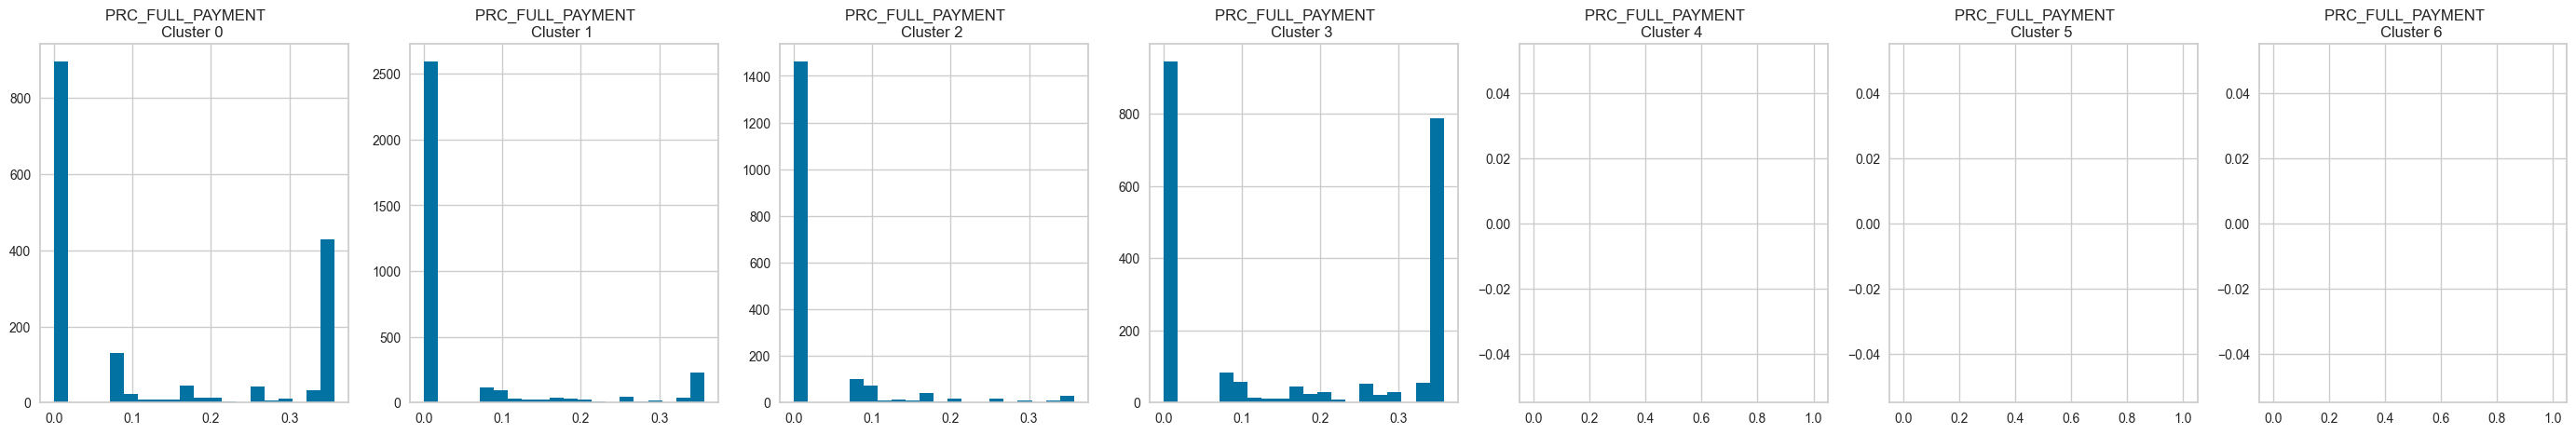

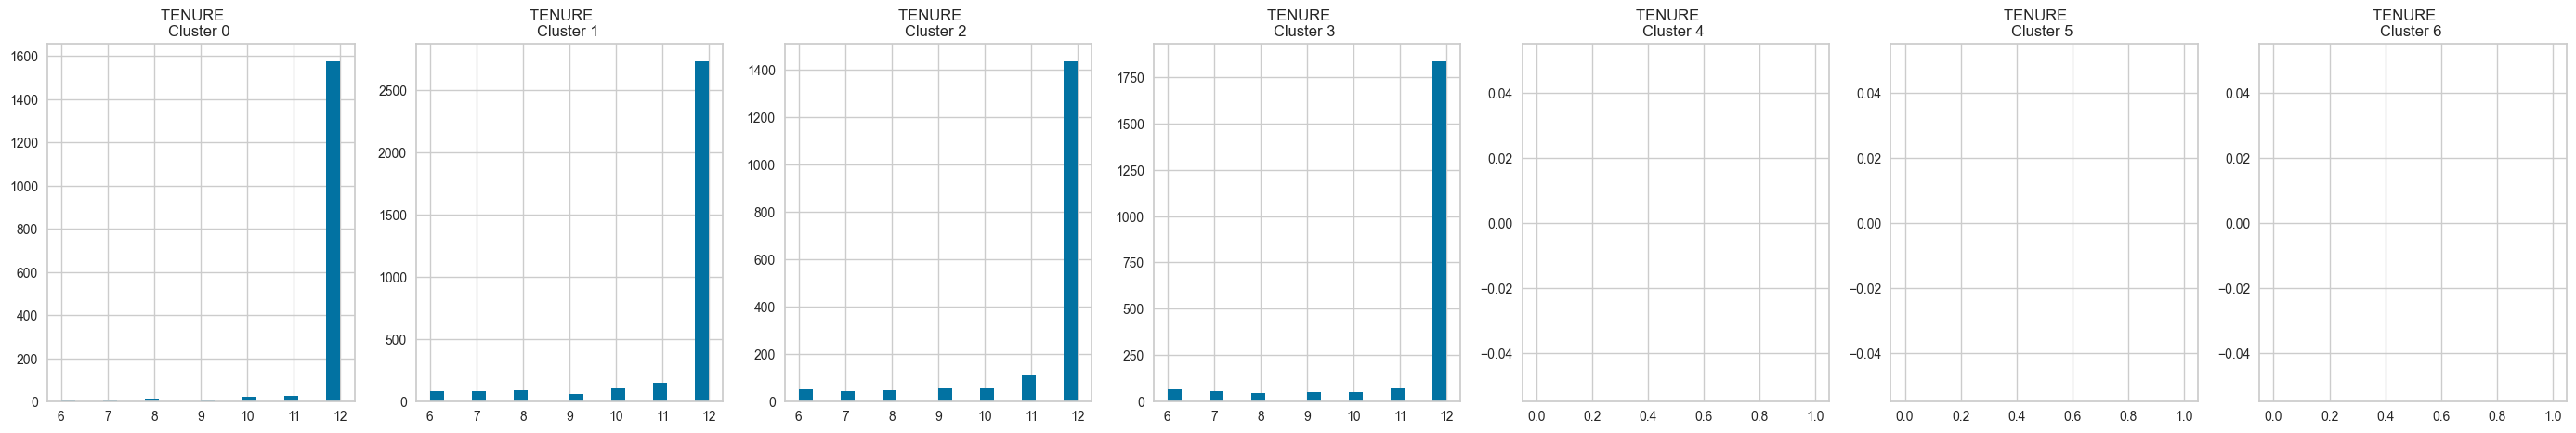

In [28]:
for i in df1.columns:
    plt.figure(figsize = (35, 5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
  
    plt.show()

In [30]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df1_scaled)
principal_comp

array([[-1.62478904, -2.38161462],
       [-2.15838957,  2.28949659],
       [ 1.1989826 ,  0.28070753],
       ...,
       [-0.46320744, -2.99044427],
       [-2.41851891, -2.4666329 ],
       [ 0.18008655, -0.90828695]])

In [31]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.624789,-2.381615
1,-2.158390,2.289497
2,1.198983,0.280708
3,-0.495849,-0.185931
4,-1.632622,-1.597279


In [32]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.624789,-2.381615,1
1,-2.158390,2.289497,2
2,1.198983,0.280708,0
3,-0.495849,-0.185931,1
4,-1.632622,-1.597279,1


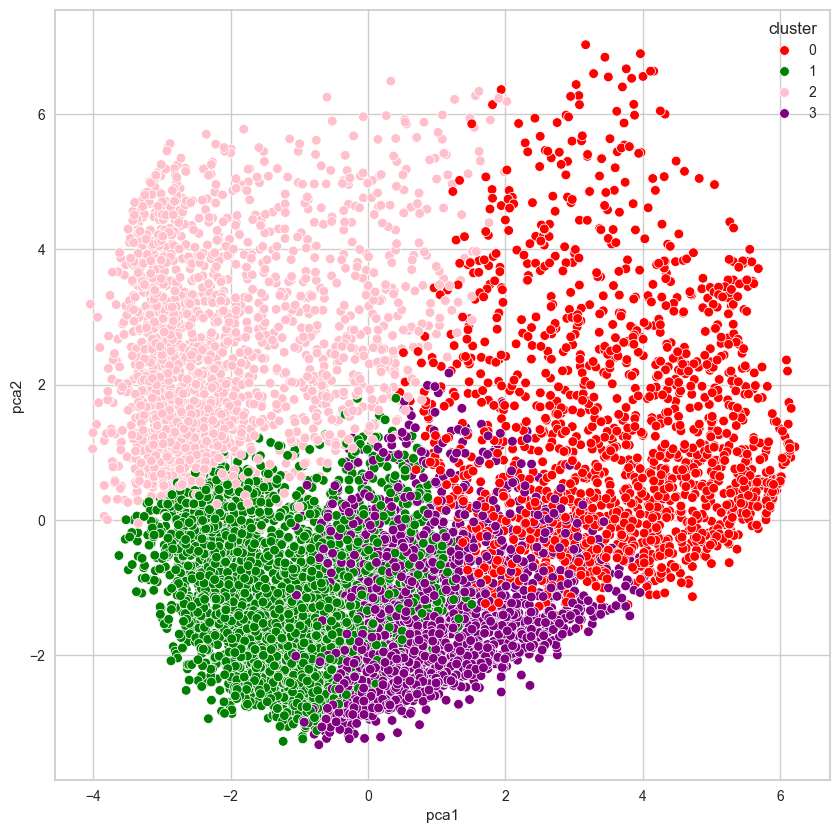

In [33]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','pink','purple'])
plt.show()